# TP noté pour le cours d'Optimisation pour l'apprentissage


Les trois premières parties de ce TP sont relativement simples, et portent sur la partie déterministe du cours. La quatrièeme et dernière partie, indépendante, est plus conséquente et porte sur la partie stochastique du cours.

<p hidden>Here are some Latex definitions</p> 

$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\N}{\mathcal{N}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ll}{\mathcal{L}}$

In [1]:
import numpy as np
from numpy import linalg
from numpy.linalg import norm, svd
from numpy.random import randn
import matplotlib.pyplot as plt
import math

In [2]:
# Permet a une cellule d'avoir plus d'un display en sortie
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Seed for np.random
np.random.seed(seed=78)

## I. Algorithme du gradient pour une fonction quadratique

Etant donné $A$ une matrice de $\R^{M\times N}$, et $b\in \R^M$, on cherche obtenir un vecteur minimisant la fonction
\begin{equation}
f(x) = \frac{1}{2}\Vert Ax - b \Vert^2.
\tag{1}
\end{equation}


On rappelle l'**Algorithme du Gradient à Pas Fixe** pour une fonction de gradient $L$-Lipschitzien:

| | | |
|-|-|-|
|(GPF)| On choisit $x_0$ un vecteur de $\R^N$ et $\rho \in ]0,2/L[$ un pas fixe. |
|  | Pour $k\geq 0$ : $x_{k+1}  = x_k  - \rho \nabla f(x_k)$. |

Voici quelques commandes python dont vous pourrez avoir besoin:

| | |
|-|-|
|`randn(m,n)`| Génère une matrice aléatoire dans $\Mm_{m,n}(\RR)$ |
| `np.zeros((m,n))` | Génère une matrice nulle dans $\Mm_{m,n}(\RR)$ |
| `np.ones((m,n))` | Génère une matrice remplie de $1$ dans $\Mm_{m,n}(\RR)$ |
| `A.T` | Transposée de la matrice `A` |
| `A@B` | Produit entre deux matrices |
| `norm(A,2)` | Plus grande valeur singulière de `A` : $\sigma_{min}(A)$ |
| `norm(A,-2)` | Plus petite valeur singulière de `A` : $\sigma_{max}(A)$ |
| `norm(x)` | Norme Euclidienne du vecteur `x` |
| `a = []` | Définit la liste vide `a` |
| `a.append(18)` | Rajoute `18` à la fin de la liste `a` |


**1)** Définir une matrice $A \in \Mm_{50,100}(\RR)$, et un vecteur $y \in \RR^{50}$, tous deux alétoires. On utilisera la fonction `randn(m,n)` qui génère une matrice dans $\Mm_{m,n}(\RR)$ dont les coefficients suivent la loi normale centrée réduite. 

Ici, et durant toute la suite du TP, les **_vecteurs_** devront être considérés comme des matrices sous forme de vecteurs **_colonne_**.

In [3]:
A = randn(50,100)
y = randn(50,1)

In [4]:
A.shape, A.dtype
y.shape, y.dtype

((50, 100), dtype('float64'))

((50, 1), dtype('float64'))

**2)** Rappel du cours/TD: Le gradient de la fonction $f$ en $x$ vaut $\nabla f(x) = A^*(Ax-b)$ et $\nabla^2 f(x) \equiv A^*A$. Calculer $L$, la constante de Lipschitz du gradient de $f$.

In [5]:
# Definition of f, using square of the norm of Ax-y
def f(x, b):
    return 1/2*math.pow(norm(A@x-b),2)

def grad_f(A, x, b):
    return A.T@(A@x-b)

def gradsqr_f():
    return A.T@A

L = math.pow(norm(A, 2),2)

In [6]:
L

287.310917398646

**3.1)** Définir une fonction `algo_gradient` qui:
- prend en arguments une matrice `A`, un vecteur `b`, un point initial `x0`, un pas `rho`, et un nombre d'itérations maximal `itermax`
- applique l'algorithme du gradient à pas constant à $f$, en partant de `x0`, pendant `itermax` itérations
- renvoie le dernier itéré de la suite

In [7]:
def algo_gradient(A, b, x0, rho, itermax):
    for i in range(itermax):
        x = x0 - rho*grad_f(A, x0, b) 
        x0 = x
    return x

**3.2)** Vérifier que votre fonction marche bien, en la testant avec $\rho=1/L$, `nmax`$=10^3$ et un point initial de votre choix dans $\RR^{100}$. Vous vérifierez également que la solution `x` ainsi obtenue satisfait $\nabla f(x) \simeq 0$.

In [8]:
x0 = randn(100,1)
x = algo_gradient(A, y, x0, 1/L, 1000)

In [9]:
grad_f(A, x, y)

array([[ 1.46824898e-15],
       [-1.26337931e-14],
       [ 4.34515599e-15],
       [-1.03491590e-15],
       [ 7.89056913e-15],
       [ 1.73027983e-14],
       [ 2.12252718e-15],
       [-3.06288907e-15],
       [-3.02718179e-15],
       [-1.39572068e-14],
       [-5.40067876e-15],
       [ 1.51265318e-14],
       [ 1.62008566e-15],
       [ 2.51560891e-15],
       [-4.83179132e-15],
       [-1.16227268e-14],
       [ 1.72718735e-15],
       [ 1.20749978e-15],
       [-3.74343797e-16],
       [-1.68599287e-14],
       [ 9.10407610e-15],
       [-4.48220401e-16],
       [-1.06034283e-14],
       [-1.11534291e-14],
       [ 5.60615382e-16],
       [-3.07786244e-15],
       [-2.56422585e-15],
       [ 2.94407959e-15],
       [-9.38668802e-15],
       [-4.40407996e-15],
       [ 1.82967533e-14],
       [-8.50659626e-15],
       [-1.24097273e-14],
       [-1.40846254e-14],
       [ 7.66332266e-16],
       [ 1.11720772e-14],
       [-5.52231967e-15],
       [-4.29809304e-15],
       [ 6.9

### This is approximately zero so the function is verified to be correct

**4)** On souhaite maintenant que l'algorithme aille le plus vite possible. Pour cela, on va se servir du cours, où on a vu que l'algorithme du gradient à pas fixe converge le plus vite lorsque $\rho = \frac{2}{\mu+L}$, où $\mu$ est la plus petite valeur singulière de $A^*A$.

**4.1)** Calculer `mu` de deux façons différentes: $\sigma_{min}(A^*A)$ et $\sigma_{min}(A)^2$. Que constatez-vous? Lequel donne un résultat satisfaisant? A votre avis, pourquoi? 

In [10]:
mu_1 = norm(A.T@A,-2)
mu_2 = math.pow(norm(A,-2),2)

In [11]:
mu_1, mu_2

(4.841868036264159e-17, 8.870793367613178)

### Now why do these values differ by so much? This is due to A * A being ill-conditioned which will be showed in the next cell (which makes mu_1 be a bad fit since it is unstable). So it makes sense to take mu_2.

In [12]:
linalg.cond(A)
linalg.cond(A.T@A)

5.691081864969725

5.933885749193752e+18

Dans la suite, on gardera  `mu` comme étant le plus satisfaisant des deux.

In [13]:
mu = mu_2

**4.2)** Réécrire la fonction `algo_gradient` de telle manière qu'elle renvoie un nouveau second argument `values`, qui est une *liste* contenant toutes les valeurs $f(x^k)$.  

In [14]:
# New version with evaluation of function
def algo_gradient2(A, b, x0, rho, itermax):
    values = []
    values.append(f(x0,y))
    
    for i in range(itermax):
        x = x0 - rho*grad_f(A, x0, b) 
        x0 = x
        values.append(f(x0,y))
    return x0, values

**4.3)** Utiliser l'algorithme comme à la question **3.2)** en remplaçant le pas $1/L$ par $\frac{2}{\mu+L}$. Tracer la courbe $f(x^k)$ correspondante pour les deux choix de pas, et comparer.

En pratique, lorsqu'on ne connait pas $\mu$, il est conseillé de prendre comme pas $\rho = \beta/L$ avec $\beta$ proche de $1.7\sim 1.8$. Est-ce que cela marche bien sur cet exemple? Pourquoi à votre avis? Ce choix est-il équivalent à supposer quelque chose à propose de $f$?

In [15]:
x_mu, values_mu = algo_gradient2(A, y, x0, 2/(mu_2+L), 1000)
x_l, values_l =  algo_gradient2(A, y, x0, 1/L, 1000)
x_beta, values_beta = algo_gradient2(A, y, x0, 1.75/L, 1000)

<Figure size 432x288 with 0 Axes>

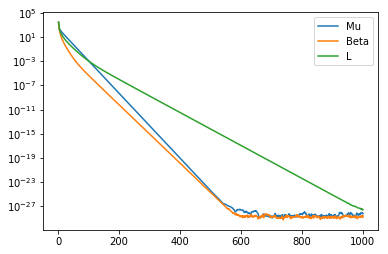

In [16]:
a = []
for i in range(1,1002):
    a.append(i)

plt.figure()
plt.yscale("log")
plt.plot(a, values_mu)
plt.plot(a, values_beta)
plt.plot(a, values_l)
plt.legend(["Mu","Beta", "L"])

### Here the beta gradient descent algorithm works well, better than L  but worse than mu. The fact that L is the worst makes sense because it is the most basic approximation. Mu is known to be the best approximation of the three theoretically. Beta works so well here because mu is small compared to L and thus is close to the Mu approximation. We assume that f is convex. 

# II. Algorithme du gradient proximal

Revenons au contexte du I. Nous avons vu que l'on pouvait minimiser $\Vert Ax-b\Vert^2$ avec l'algorithme du gradient, et donc résoudre l'équation $Ax=b$. Mais que peut-on dire de la solution que l'on a ainsi obtenue?

In [17]:
######################################################################
# N'exécuter cette cellule qu'une seule fois (prend un peu de temps) #
######################################################################
import sys
#!{sys.executable} -m pip install git+https://github.com/Guillaume-Garrigos/invprob.git
# python -m pip install git+https://github.com/Guillaume-Garrigos/invprob.git

In [18]:
from invprob import sparse
from invprob.sparse import stem

**1.1)** Utiliser la fonction `sparse.randn` pour générer un vecteur $x_{origin}$ de $\RR^{100}$ qui soit *parcimonieux* (*sparse* en VO), c'est-à-dire qui possède beaucoup de zéros. La fonction `stem` permet d'afficher les composantes de ce vecteur.

/home/alexander/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'use_line_collection'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Un beau signal bien parcimonieux')

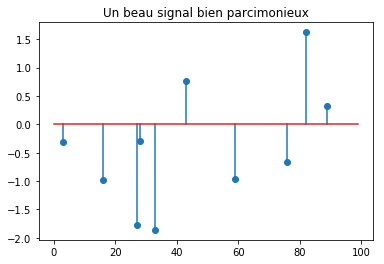

In [19]:
nb_composantes = 10
x_origin = sparse.randn(100,1,nb_composantes)
stem(x_origin)
plt.title("Un beau signal bien parcimonieux")

**1.2)** Définir une matrice aléatoire $A \in \Mm_{50,100}(\RR)$, et $b:=Ax_{origin}$.

In [20]:
A = randn(50,100)
b = A@x_origin
x0 = randn(100,1)

**1.3)** Utiliser l'algorithme du gradient du **I.**, pour calculer une solution du système linéaire $Ax=b$, que l'on notera `x_sol`.
Utiliser `stem` pour visualiser si elle ressemble à `x_origin`. On utilisera un grand nombre d'itérations ($> 10^3$). Que constatez-vous? Est-ce que faire varier les paramètres de l'algorithme change quelque chose? Expliquer ce qui se passe.

In [21]:

x_sol = algo_gradient(A, y, x0, 1/L, 1000)


/home/alexander/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'use_line_collection'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


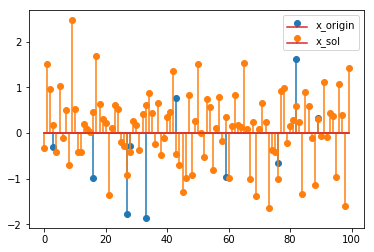

In [22]:
# code pour tracer deux signaux x_origin et x_sol
stem(x_origin, "C0")
stem(x_sol, "C1")
_=plt.legend(["x_origin","x_sol"])

### We can see that the solution is not sparse at all. All (or almost all) elements are nonzero whereas x_origin only has 10 components. Changing the parameters does not do much. Since there are an infinity of solutions we always go to one which is extremely likely to have all or almost all nonzero elements (not sparse at all).

**2)** Le système linéaire $Ax=b$ admet une infinité de solutions, ce qui est normal vu les dimensions de la matrice $A$. Cela veut donc dire que malgré $b=Ax_{origin}$, on ne pourra pas retrouver ce vecteur $x_{origin}$ en simplement minimisant $\Vert Ax-b\Vert^2$.

Par contre il se trouve que parmi les solutions de $Ax=b$, $x_{origin}$ est certainement la solution la plus **parcimonieuse**, ce qui se traduit en général par le fait d'avoir une *faible norme L1* (voir figure ci-dessous).

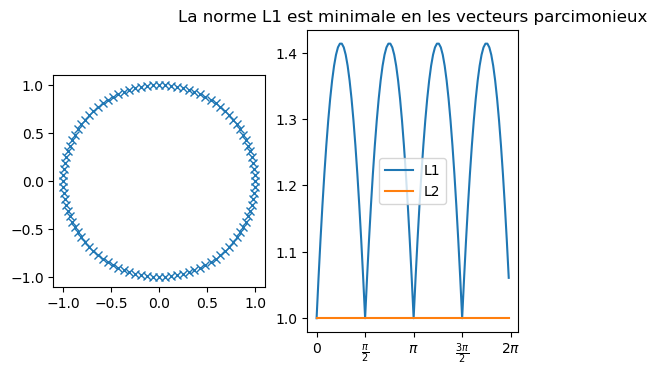

In [23]:
# executer
X, Y = [], []
value_L1, value_L2 = [], []
angles = np.arange(0, 2, 0.02)*np.pi
for angle in angles:
    x = np.cos(angle)
    y = np.sin(angle)
    X.append(x)
    Y.append(y)
    value_L1.append(np.abs(x)+np.abs(y))
    value_L2.append(x**2 + y**2)

_ = plt.figure(dpi=100)

_ = plt.subplot(1, 2, 1)
_ = plt.plot(X, Y, 'x')
_ = plt.gca().set_aspect('equal')

_ = plt.subplot(1, 2, 2)
_ = plt.plot(angles, value_L1)
_ = plt.plot(angles, value_L2)
_ = plt.legend(["L1","L2"])
_ = plt.xticks([0, np.pi/2, np.pi, np.pi*3/2, 2*np.pi], ['0', '$\\frac{\pi}{2}$', '$\pi$', '$\\frac{3\pi}{2}$', '$2\pi$'])
_ = plt.title('La norme L1 est minimale en les vecteurs parcimonieux')

Donc il est raisonable de penser que $x_{origin}$ est de norme L1 minimale parmi les solutions de $Ax=b$. Autrement dit (et c'est une hypothèse raisonable), $x_{origin}$  est la solution du problème 

$$ \min\limits_{Ax=b} \Vert x \Vert_1.  $$

Pour résoudre ce problème, on peut le *pénaliser*, c'est-à-dire introduire un paramètre $\alpha>0$ petit, et résoudre:

$$ \min\limits_{x} \alpha \Vert x \Vert_1 + \frac{1}{2}\Vert Ax-b \Vert^2. \tag{$P_\alpha$}$$


On introduit l'**Algorithme du Gradient Proximal** pour la minimisation d'une fonction $f=g+h$ où $h$ est à gradient $L$-Lipschitzien et $g$ quelconque:

| | | |
|-|-|-|
|(GP)| On choisit $x_0$ un vecteur de $\R^N$ et $\rho \in ]0,2/L[$ un pas fixe. |
|  | Pour $k\geq 0$ : $x_{k+1}  = prox_{\rho g} \left(x_k  - \rho \nabla h(x_k)\right)$. |

où, pour une fonction $\phi \in \Gamma_0(H)$, l'opérateur proximal $prox_\phi : H \rightarrow H$ est défini par:

$$ prox_\phi(x) := {\rm{argmin}}_{x' \in H}~\phi(x') + \frac{1}{2}\Vert x-x' \Vert^2.$$

In [24]:
from invprob import prox

**3)** Pour tout réel $\beta >0$, il est possible de calculer l'opérateur proximal de la fonction $\beta \Vert \cdot \Vert_1$ en un vecteur $x \in \mathbb{R}^N$, en utilisant la commande `prox.L1(X, beta)`.

Tracer le graphe de la fonction $t \mapsto prox_{\vert \cdot \vert}(t)$ sur l'intervalle $[-2,2]$. Que constatez-vous lorsque $t \in [-1,1]$? Quel impact pensez-vous que cela aura sur les itérés de l'algorithme du gradient proximal?

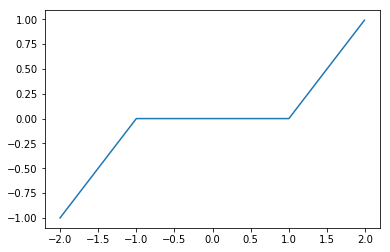

In [25]:
x = np.arange(-2, 2, 0.01)
y = prox.L1(x,1)
line, = plt.plot(x, y)

plt.show()

### Between -1 and 1, prox gives 0. The proximal gradient algorithm´s next step will take us to zero if the gradient of h is small enough to keep us in the region. 

**4)** Ecrire une fonction `algo_gradient_prox` qui 
- prend en arguments une matrice `A`, un vecteur `b`, un point initial `x0`, un pas `rho`, un nombre d'itérations maximal `itermax`, ainsi que le paramètre `alpha` apparaissant dans le problème $(P_\alpha)$.
- applique l'algorithme du gradient proximal à $f$ , en partant de `x0`, pendant `itermax` itérations. *(Faites **très** attention à qui est $g$ dans la définition de l'algorithme)*
- renvoie le dernier itéré de la suite





In [26]:
def algo_gradient_prox(A, b, x0, rho, itermax, alpha):
    for i in range(itermax):
        x = prox.L1(x0-rho*grad_f(A,x0,b),rho*alpha)
        x0 = x
    return x



**5)** Utiliser cette fonction avec des petites valeurs pour `alpha` (entre 0.1 et 10) et visualiser le résultat comme précédemment. Commenter vos expériences.

In [27]:
x_sol = algo_gradient_prox(A, b, x_origin, 1/L, 1000, 0.1)
x_sol2 = algo_gradient_prox(A, b, x_origin, 1/L, 1000, 10)

/home/alexander/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'use_line_collection'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


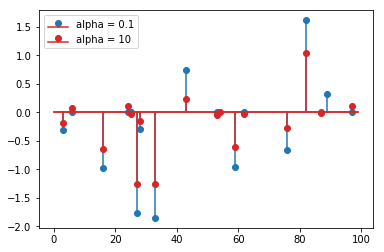

In [28]:

stem(x_sol, "C0")
stem(x_sol2, "C3")
_=plt.legend(["alpha = 0.1","alpha = 10"])

### We can notice that larger alpha correspond with smaller coordinate values (by modulus). Since there are an infinite amount of solutions and since alpha is penalisation term this is consistent with theory 

**6)** Le code qui suit devrait vous permettre d'avoir une visualisation interactive des solutions, en fonction du choix de `alpha`. 
Vous devrez compléter le code où c'est indiqué.

(Pensez à vérifier que vous n'avez pas oublié l'installation requise au tout début du sujet)

In [29]:
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets

In [30]:
L = norm(A.T@A,2)
def widget_solution_l1(alpha): # calcule la solution du problème à alpha donné, et l'affiche
    x_sol = algo_gradient_prox(C, D, X1, 1/L, 1000, alpha)
    _ = plt.cla()
    _ = plt.title(r"Comparaison entre $x_{origin}$ et la solution $x_{sol}$ pour $\alpha=$" + str(np.ceil(alpha*100)/100))
    _ = sparse.stem(x_origin, "C0")
    _ = sparse.stem(x_sol, "C1")
    _ = plt.show()

In [31]:
_ = plt.figure()
interactive(widget_solution_l1, 
            alpha=widgets.FloatLogSlider(min=-2, max=2, step=0.1, value=1))

interactive(children=(FloatLogSlider(value=1.0, description='alpha', max=2.0, min=-2.0), Output()), _dom_class…

<Figure size 432x288 with 0 Axes>

### When alpha is close to 10 there are very few non zero elements in the vector and the ones that are nonzero are close to zero. On the other hand the smaller alpha gets the more non zero values there are. When alpha is around 0.1 almost all the 100 elements in the vector are non zero! Also, the larger the alpha the smaller the closer the coordinates are to 0.

# III. Application au traitement d'images

Depuis Moodle, télécharger le fichier `photo.npy`, et le placer dans le même dossier que celui contenant ce notebook. Vous pourrez ensuite charger ce fichier comme une image dans python via la commande `np.load`, qui l'importe comme une matrice (dont les coefficients correspondent aux pixels) ; et l'afficher avec la commande `imshow`.

In [32]:
from invprob.signal import imread, imshow, gaussian_kernel, dct2, idct2
from invprob.general import dotp

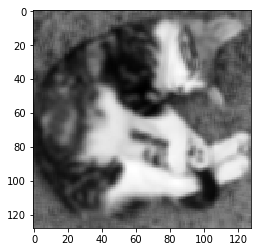

In [33]:
b = np.load('photo.npy')
imshow(b)

Le but de cette section va être d'essayer de retirer l'effet de flou sur cette image, en la rendant plus nette.
Pour cela nous allons simplement *modéliser* notre problème comme un problème inverse linéaire:
- il existe une certaine image originale, notons-la $x$, que l'on voudrait récupérer.
- cette image a subi un "flou", ce qui a abouti à l'image que l'on a téléchargé. Appelons cette image $b$.
- l'opération de floutage est en fait une opération *linéaire* (on l'admet pour l'instant), donc on peut dire que $b=Ax$, où $A$ est l'application linéaire de floutage.
- Pour retrouver $x$ à partir de $b$, il nous "suffit" donc de résoudre le système $Ax=b$, ce qui revient à minimiser $\Vert Ax-b \Vert^2$.

**1)** Commençons par nous intéresser à cette application linéaire de floutage $A$, définie ci-dessous non pas comme une matrice mais via la fonction `flou()`.

In [34]:
# Executer cette cellule sans la modifier
kernel_size = 3
kernel_std = 1
im_shape = (128,128)
kernel_fourier = gaussian_kernel(kernel_size, kernel_std, im_shape)

def flou(x): # La fonction qui permet d'évaluer A@x
    return np.real(idct2(dct2(x) * kernel_fourier))

L = np.max(np.abs(kernel_fourier)) # Ceci est la plus grande valeur propre de A.T @ A

**1.1** Soit $b$ l'image précédemment importée. Calculer $Ab$, et afficher le résultat avec `imshow`. Faire de même avec $A^4b$. Que constatez-vous?

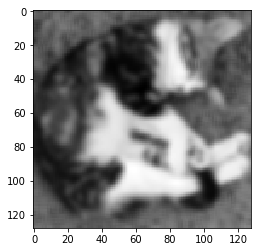

In [35]:
imshow(flou(b))

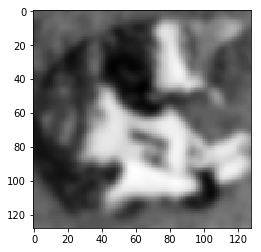

In [36]:
imshow(flou(flou(flou(flou(b)))))

### We notice here that if we keep applying the blurring matrix we keep blurring it more and more

**1.2)** Comment se convaincre que cette application `flou` est linéaire? Très simple: générer deux matrices aléatoires $X$ et $Y$ dans $\Mm_{128,128}(\RR)$, et vérifier que $A(X+Y)=AX + AY$.

In [37]:
X = randn(128,128)
Y = randn(128,128)

#Due to rounding errors in python need to round (to 8 decimal places for example)
np.allclose(flou(X+Y),flou(X)+flou(Y), atol=1e-8)


True

**1.3)** Non seulement `flou` est linéaire, mais elle est en plus symétrique, c'est-à-dire que $A^*=A$. Pour s'en convaincre, il suffit de prendre deux matrices aléatoires $X$ et $Y$ et de vérifier que $\langle AX,Y\rangle = \langle X,AY \rangle$. On pourra utiliser la fonction `dotp(.,.)` qui calcule le produit scalaire entre deux vecteurs.

In [38]:
#Due to rounding errors in python need to round (to 8 decimal places for example)
round(dotp(X,flou(Y)),8)==round(dotp(flou(X),Y),8)

True

2.1)** Adapter le code de la question **I.3.1)** pour coder une nouvelle fonction `defloutage`, qui:
- prend en entrée une image floutée `b`, un nombre maximal d'itérations `itermax`
- applique l'algorithme du gradient à pas constant à $\Vert Ax-b \Vert^2/2$, où $A$ est l'application de flou, en initialisant l'algorithme à zéro, et en prenant comme pas $\rho = 1.9/L$.

In [39]:
def defloutage(b, itermax):
    x = np.zeros((128,128))
    for i in range(itermax):
        x = x -1.9/L*(flou(flou(x)-b))
    return x


**2.2)** Tester cette fonction avec `itermax=2000`. Comparer le résultat avec la photo floutée originale.

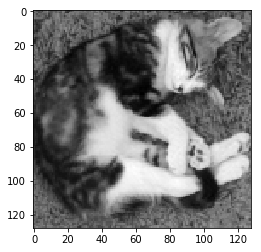

In [40]:
imshow(defloutage(b, 2000))

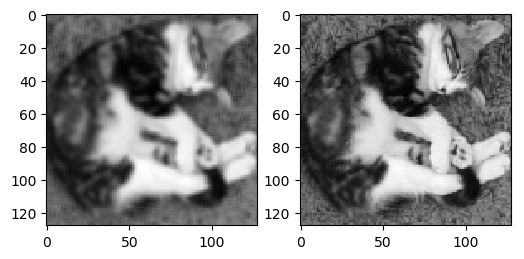

In [41]:
_ = plt.figure(dpi=100)
_ = plt.subplot(1,2,1)
imshow(b)
_ = plt.subplot(1,2,2)
imshow(defloutage(b, 2000))

## IV. Algorithme du Gradient Stochastique pour du not-so-big-data

In [42]:
from numpy.linalg import norm, svd
from numpy.random import randn, randint
import random
# Seed for np.random
np.random.seed(seed=78)

On s'intéresse ici à la minimisation d'une fonction logistique (régularisée):

$$ f(w) = \frac{1}{m} \sum\limits_{i=1}^m \ln \left( 1 + e^{y_i \langle \phi_i, w \rangle} \right)  + \frac{\mu}{2} \Vert w \Vert^2, $$

où $\phi_i \in \R^n$, $y_i \in \{\pm 1 \}$ et $\mu >0$. Par la suite, pour plus de lisibilité on notera `nb_data` au lieu de $m$, et `dim_data` au lieu de $n$.

**Dans toute la suite**, et à moins que le contraire soit précisé, tous les vecteurs devront être écrits sous la forme de vecteurs 1D : `array([1, 2, 3,...])`

In [43]:
def loss_logistic(A, y, mu, X):
    # X est une suite de vecteurs de la forme dim_data x nb_points
    # X peut également être simplement un seul 1D vecteur de taille dim_data
    # La fonction renvoie un vecteur "value" de longueur nb_points
    # où chaque composante value[i] vaut f(X[:,i])
    nb_data = A.shape[0]
    dim_data = A.shape[1]
    if X.ndim == 1:
        value = 0
    else:      
        value = np.zeros(X.shape[1])
    for i in range(nb_data):
        r = np.log(1 + np.exp((A[i,:]@X)*y[i]))
        value = value + r 
    return (value/nb_data) + (mu/2)*(np.sum(X*X, axis=0))

In [44]:
mu = 0.2

On rappelle si besoin que 

$$ \nabla f_i(w) = \frac{y_i e^{y_i \langle \phi_i, w \rangle}}{1 + e^{y_i \langle \phi_i, w \rangle}} \phi_i + \mu w$$

L'objectif ici est d'étudier le comportement de SGD sur un exemple simple, et de regarder si les bornes que l'on a vu en cours sont pertinentes (spoiler: oui). On va notamment s'intéresser à l'influence de la taille du batch et du choix du pas. Ici le sampling sera uniforme.

Afin de pouvoir visualiser par la suite les résultats des expériences, on supposera que les features sont de dimension $2$ ($n=2$).

**1.1)** Générer un jeu de features alétoires, sous la forme d'une matrice aléatoire $A$ de taille `nb_data`x2. 



<div>
<img src="https://cloud.math.univ-paris-diderot.fr/apps/files_sharing/publicpreview/Pt63MJCaF9TXbaw?x=2048&y=476&a=true&file=features.png&scalingup=0" width="400"/>
</div>


Pour l'instant on prendra `nb_data=1000`.

In [45]:
nb_data = 1000
A= randn(nb_data,2)
A

array([[ 0.12204614, -0.30471827],
       [ 0.57797539,  0.57525502],
       [-0.06078835,  0.50526194],
       ...,
       [-1.02394542, -0.79319606],
       [ 0.61167863,  0.06134043],
       [-0.10847748, -0.30356703]])

**1.2)** Générer un jeu de labels, sous la forme d'un vecteur $y$ aléatoire de taille `nb_data` à valeurs dans $\{ \pm 1 \}$.

In [46]:
#Takes sign of random vector which is the same thing
y = np.sign(randn(nb_data,1))

**2.1)** Définir une fonction `grad_logistic(A, y, mu, w, i)` qui prend en entrée une matrice de features `A`, un vecteur de labels `y`, le paramètre $\mu$, un vecteur `w` dans $\R^2$, et un entier `i` ; et qui renvoie $\nabla f_i(w)$. On rappelle que les features correspondent aux lignes de `A`.

In [47]:
def grad_logistic(A, y, mu, w, i):
    top_of_fraction = y[i]*np.exp((A[i]@w)*y[i])
    bottom_of_fraction = 1+ np.exp((A[i]@w)*y[i])   
    return (top_of_fraction/bottom_of_fraction)*A[i]+(mu)*w
    
    

**2.2)** Définir une fonction `grad_batch_logistic(A, y, mu, w, batch)` qui prend en entrée une matrice de features `A`, un vecteur de labels `y`, le paramètre $\mu$,  un vecteur `w` dans $\R^2$, et une *liste* `batch` d'entiers ; et qui renvoie $$\frac{1}{\vert batch \vert}\sum\limits_{i \in batch}\nabla f_i(w).$$

On rappelle que l'on peut faire une boucle for sur une liste donnée : `for i in nom_de_la_liste:` ; et que la longueur d'une liste s'obtient avec `len(nom_de_la_liste)`

In [48]:
def grad_batch_logistic(A, y, mu, w, batch):
    a=0
    j=0
    for i in range(len(batch)):
        a+= grad_logistic(A,y,mu,w,batch[i])
    
    return a/(len(batch))

    
    

**2.3)** Définir une fonction `Lipschitz_batch(A, mu, batch_size)` qui prend en entrée une matrice de features `A`, la constante `mu`, une taille de batch `batch_size` ; et qui renvoie $\Ll$, la constante de smoothness par rapport au sampling vu en cours. On rappelle si besoin que dans notre cadre de mini-batch sampling, on a (avec `m=nb_data` et `b=batch_size`):
$$\Ll \leq \frac{(b-1)m}{(m-1)b} \bar L + \frac{m-b}{b(m-1)} L_{max},$$ 
où $L_{max} = \max_i L_i$, $L_i = Lip(\nabla f_i)$ et $\bar L = (1/m)\sum_i Lip(\nabla f_i)$. 

**NB:**  Vous pourrez consulter le TD au sujet du calcul de $L_i$.

In [49]:
def Lipschitz_batch(A, mu, batch_size):
    L_max = 0
    for i in range(len(A)):
        a = 1/4*(norm((A[i])**2) +mu)
        if a > L_max: 
            L_max = a
            
    L_sum=0
    for i in range(len(A)):
        L_sum+= 1/4*(norm((A[i])**2) +mu)
    
    total_first = (L_sum*(batch_size -1)*len(A))/((len(A)-1)*(batch_size)*len(A))
    total_second = ((len(A)-batch_size)*L_max)/((batch_size)*(len(A)-1))
    return total_first + total_second

    
    

**3.0)** Définir une fonction `SGD(A, b, mu, iter_max, batch_size, stepsize_factor, starting_point)` qui applique l'algorithme du gradient stochastique au problème de régréssion logistique présenté au début de cette section:
- Le pas de l'algorithme sera constant, et égal à `stepsize_factor`$/\Ll$.
- A chaque itération, on tirera au hasard et uniformément une liste de taille `batch_size` parmi $\{0,\cdots,m-1\}$, avec la commande `random.sample(range(m), batch_size)`
- L'algorithme fera `iter_max` itérations.
- L'algorithme commencera avec `starting_point` comme premier itéré.
- L'algorithme renverra deux variables en sortie:
    - Le dernier itéré de la suite (un vecteur 1D)
    - Une matrice `iterates` de taille 2 x `iter_max`, qui contiendra (en colonnes) la suite des vecteurs $w^k$ générés par l'algorithme.

In [50]:
def SGD(A, y, mu, iter_max, batch_size, stepsize_factor, starting_point):
    rho = (stepsize_factor)/(Lipschitz_batch(A, mu, batch_size))
    w = starting_point
    iterates = np.zeros((iter_max,2))
    iterates[0] = w
    for i in range(iter_max):
        batch = random.sample(range(nb_data),batch_size)
        w = w -rho* grad_batch_logistic(A, y, mu, w, batch)
        iterates[i]=w
    np.asmatrix(iterates)
    
    return w, iterates


**3.1)** Par la suite, on aura besoin d'avoir accès à la solution "exacte" du problème, qu'on notera `w_sol`. Pour la calculer on utilisera `SGD` avec un batch complet (c'est à dire qu'on fera en fait l'algorithme du gradient). On prendra `stepsize_factor` (à vous de le choisir!), `starting_point=np.zeros(2)` et `iter_max` le plus grand possible sans que l'algo ne tourne plus d'une minute.

In [51]:
SGD(A,y,mu, 600, len(A), 0.5, np.zeros(2))


(array([-0.0573222,  0.0272492]), array([[-0.02735844,  0.01270863],
        [-0.0416547 ,  0.01948464],
        [-0.0491282 ,  0.02310039],
        ...,
        [-0.0573222 ,  0.0272492 ],
        [-0.0573222 ,  0.0272492 ],
        [-0.0573222 ,  0.0272492 ]]))

In [52]:
a = SGD(A,y,mu, 600, len(A), 0.5, np.zeros(2))

**3.2)** S'assurer que `w_sol` est bien un minimiseur (et donc que votre algorithme marche à peu près) en vérifiant que $\nabla f(w_{sol}) \simeq 0$. Vous pourrez calculer astucieusement $\nabla f$ en utilisant la fonction `grad_batch_logistic`

In [53]:
w_sol = a[0]
grad_batch_logistic(A, y, mu, w_sol, list(range(len(A))))

array([-6.18255447e-18, -1.59594560e-17])

### It is of the order 10^{-9} which is extremely close to zero so it seems that our algorithm works well

**3.3)** Définir `inf_f` comme étant l'infimum de $f$, à l'aide de `w_sol` et la fonction `loss_logistic` qu'on vous a donné au début de cette section

In [54]:
#INF_F
inf_f  = loss_logistic(A, y, mu, w_sol)
inf_f

array([0.69220631])

In [55]:
#RAND VALUE OF F 
F = loss_logistic(A, y, mu, a[1][3])
F

array([0.69221174])

**4)** On souhaite comparer la vitesse de convergence de la méthode, en fonction du choix de la taille de batch. Pour cela on va faire tourner l'algorithme dans 3 régimes, correspondant à trois tailles de batch: `1` (le single element sampling), `nb_data` (full batch), et `minibatch=5` (intermédiaire).

**4.1)**  Utiliser l'algorithme pour chaque taille de batch. Pour chacun d'entre eux on utilisera les mêmes paramètres :`iter_max` $\sim$ 100 (à vous de choisir), `stepsize_factor` = 0.5 et un même point initial aléatoire, par exemple `10*randn(2)` 

**NB:** on évite de prendre 0 comme point initial car on est dans un cadre assez spécifique où, même si `A` et `y` sont aléatoires, la solution du problème est toujours concentrée autour de 0. Ce serait tricher!

In [56]:
batch1= SGD(A, y, mu, 400, 1, 0.5, 10*randn(2))
batch5 = SGD(A, y, mu, 400, 5, 0.5, 10*randn(2))
batchall = SGD(A, y, mu, 400, nb_data, 0.5, 10*randn(2))

**4.2)** En utilisant la liste des itérés produite par SGD, et la fonction `loss_logistic`, tracer $f(x^k) - \inf f$ pour chacun des trois régimes. Pour tracer une courbe il suffira d'utiliser `plt.plot(iterations, vecteur_des_valeurs)`, avec `iterations=np.arange(iter_max)` . Comparer les courbes et commenter.

In [57]:
logistic = []
for i in range(len(batchall[1])):
    logistic.append(loss_logistic(A, y, mu, batchall[1][i]))

logistic = logistic - inf_f

logistic1 = []
for i in range(len(batch5[1])):
    logistic1.append(loss_logistic(A, y, mu, batch5[1][i]))

logistic1 = logistic1 - inf_f


logistic2 = []
for i in range(len(batch1[1])):
    logistic2.append(loss_logistic(A, y, mu, batch1[1][i]))

logistic2 = logistic2 - inf_f


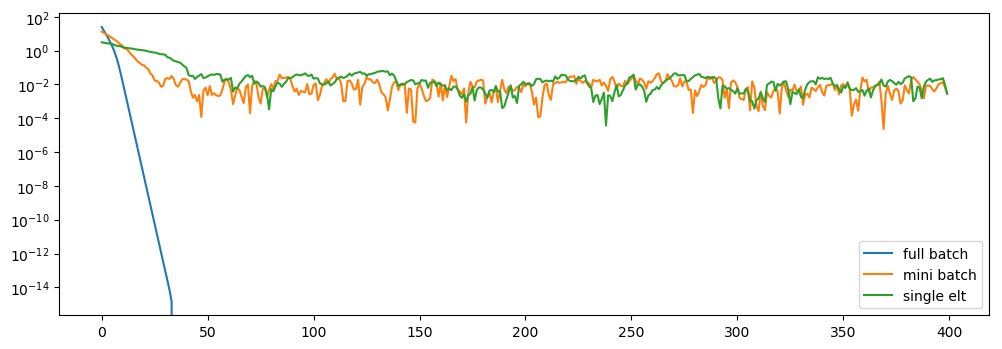

In [58]:
iterations = np.arange(400)
_ = plt.figure(dpi=100, figsize=(12, 4))
_ = plt.yscale("log")
_ = plt.plot(iterations, logistic)
_ = plt.plot(iterations, logistic1)
_ = plt.plot(iterations, logistic2)
_ = plt.legend(['full batch','mini batch','single elt'])

**4.3)** A la question précédente on a tracé la courbe de $f(x^k) - \inf f$. Or comparer ces courbes en tout $k$ est injuste : une itération pour la méthode avec un full batch coute `nb_data` fois plus cher qu'une itération avec un batch de taille 1.

Reprendre donc les deux questions précédentes, mais cette fois-ci on va pour chaque algorithme utiliser un nombre différent d'itérations, de telle façon que chaque algorithme ne passe que `10` fois sur les données, exactement. On tracera alors, pour chaque régime, une courbe *constante par morceaux*: le vecteur des abscisses `iterations` devra être modifié en fonction de la taille du batch. 

Commenter les courbes que vous obtenez, en faisant le lien notamment avec les résultats du cours. Pensez-vous que le problème que l'on résoud est "facile"? Avec quel paramètre pourriez-vous jouer pour changer cela?

In [59]:
nb_data

1000

In [60]:
newbatch1= SGD(A, y, mu, 10000, 1, 0.02, 10*randn(2))
newbatch5 = SGD(A, y, mu, 2000, 5, 0.1, 10*randn(2))
newbatchall = SGD(A, y, mu, 10, nb_data, 0.7, 10*randn(2))

In [61]:
newlogistic = []
for i in range(len(newbatchall[1])):
    newlogistic.append(loss_logistic(A, y, mu, newbatchall[1][i]))

newlogistic = newlogistic - inf_f

newlogistic1 = []
for i in range(len(newbatch5[1])):
    newlogistic1.append(loss_logistic(A, y, mu, newbatch5[1][i]))

newlogistic1 = newlogistic1 - inf_f


newlogistic2 = []
for i in range(len(newbatch1[1])):
    newlogistic2.append(loss_logistic(A, y, mu, newbatch1[1][i]))

newlogistic2 = newlogistic2 - inf_f

In [62]:
newlogistic

array([[1.20775523e+01],
       [5.71214673e+00],
       [2.50530925e+00],
       [9.46922745e-01],
       [2.71657887e-01],
       [5.26531433e-02],
       [7.60675049e-03],
       [1.00750603e-03],
       [1.31860373e-04],
       [1.72454670e-05]])

In [63]:
# Une fonction qui pourra vous être utile pour transformer des vecteurs en vecteurs constants par morceaux : testez-là sur np.arange(10) !
def dilater(x, factor):
    # dilates x by a factor making it longer and therefore constant by parts
    y = np.zeros(x.shape[0]*factor)
    for k in range(x.shape[0]):
        y[k*factor:(k+1)*factor] = x[k]
    return y

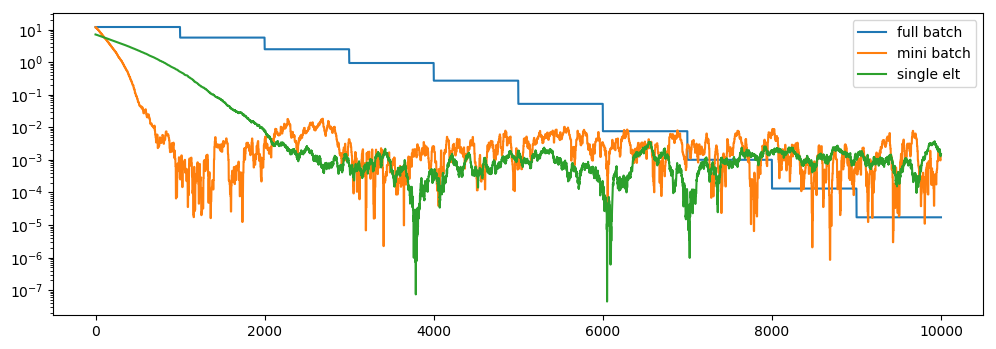

In [64]:
iterations = np.arange(10000)
_ = plt.figure(dpi=100, figsize=(12, 4))
_ = plt.yscale("log")
_ = plt.plot(iterations, dilater(newlogistic,1000))
_ = plt.plot(iterations, dilater(newlogistic1,5))
_ = plt.plot(iterations, newlogistic2)
_ = plt.legend(['full batch','mini batch','single elt'])

### We can see that at the start mini_ batch and single elt work much better than full batch. We can also see that after going through the data 10 times overall the three different models give more or less the same accuracy. But this is only going through the full_batch data 10 times. We can increase the accuracy much more if we keep going with the full_batch data many times. Full_batch performs better asymptotically compared with mini and single batch. We believe that the problem itself is not that difficult since we converge and get good results quickly. To make it more difficult the elements of matrix A should be chosen with much higher variance or with a different distribution that is not mainly around 0 (for example a uniform distribution between -10000 and +10000).

**5)** On va maintenant essayer de visualiser la trajectoires des *itérés* de la suite générée par SGD dans le plan (c'est pour cela qu'on s'est fixés `dim_data=2`). Ci-dessous, une fonction `plot_levelset` qui permet de tracer les itérés d'une suite, ainsi que d'afficher les courbes de niveau de la fonction $f$. 

**NB:** ne pas modifier le code ci-dessous

**NB:** Si vous n'avez pas respéecté la consigne d'écrire les vecteurs comme des 1D-arrays, vous aurez ici des problèmes.

In [65]:
def get_box(X, crop=None, option=None):
    # Given a 2D sequence X of size 2 x nb_iter
    # returns a box=[mx,Mx,my,mY] in which it belongs (for display purposes)
    if option is "square":
        min_x = np.min(X); max_x = np.max(X); min_y = min_x; max_y = max_x;
    else:
        min_x = np.min(X[0,:]); max_x = np.max(X[0,:]); min_y = np.min(X[1,:]); max_y = np.max(X[1,:]);
    if crop is None: crop = 0.31
    mx = min_x - crop * (max_x-min_x); Mx = max_x + crop * (max_x-min_x);
    my = min_y - crop * (max_y-min_y); My = max_y + crop * (max_y-min_y);
    return [mx, Mx, my, My]

def plot_levelset(A, b, mu, iterates, box=None):
    # Given the function f(A,b) et a 2D sequence of points (X,Y)
    # plots the contour of the function and the sequence of iterates of size 2 x nb_iter
    # We do it within a box=[mx,Mx,my,mY]
    if box is None: box = get_box(iterates)
    [mx, Mx, my, My] = box
    x = np.linspace(mx, Mx, 50)
    y = np.linspace(my, My, 50)
    X_grid, Y_grid = np.meshgrid(x, y)
    grid = np.zeros((2,50*50))
    grid[0,:] = X_grid.reshape(50*50)
    grid[1,:] = Y_grid.reshape(50*50)
    Z = loss_logistic(A, b, mu, grid)
    Z_grid = Z.reshape(50,50)
    _=plt.contour(X_grid, Y_grid, Z_grid, colors='black') # level sets
    _=plt.scatter(iterates[0,0],iterates[1,0], facecolors='none', edgecolors='r', s=100) # strating point
    _=plt.scatter(iterates[0,:],iterates[1,:], facecolors='none', edgecolors='b') # trajectory
    plt.gca().set_aspect('equal', adjustable='box')

def plot_solution(w_sol, radius=None):
    if radius is None: radius=0
    ball = plt.Circle((w_sol[0], w_sol[1]), radius=radius, color='r', fill=False)
    plt.gcf().gca().add_artist(ball) # the circle
    _=plt.scatter(w_sol[0], w_sol[1], marker='*', edgecolors='r', s=100) # solution

Ici, on va un peu changer les paramètres du problème. 

Générer à nouveau, comme pour la question **1)**, un jeu de données `A,y` avec `nb_data = 20`. On prendra un nouveau `mu=0.01` On pensera à égalment calculer à nouveau `w_sol`.

In [66]:
nb_data = 20
A= randn(nb_data,2)
y = np.sign(randn(nb_data,1))
mu=0.01

**5.1)** Faire tourner l'algorithme avec les paramètres de votre choix, et utiliser `plot_levelset(A, y, mu, iterates)` pour visualiser la suite des itérés qu'elle génère. On pourra également utiliser `plot_solution(w_sol)` pour afficher la solution du problème (pour avoir un "joli" point de départ, je conseille de le prendre à distance raisonable de l'origine). N'hésitez pas a tester différents paramètres et points initiaux.

In [67]:
a = SGD(A,y,mu, 100, 15,0.7, 10*randn(2))


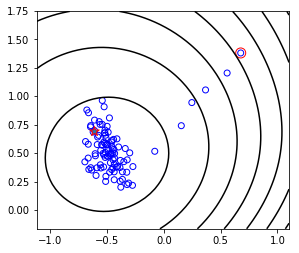

In [68]:
plot_levelset(A, y, mu, a[1].T)
plot_solution(a[0])

**5.2)** Faire varier la taille du batch, et la valeur de `stepsize_factor`, et décrivez ce que vous observez.

In [69]:
b = SGD(A,y,mu, 100, 10,0.3, 10*randn(2))
c = SGD(A,y,mu, 100, 10,0.1, 10*randn(2))
d = SGD(A,y,mu, 100, 5,0.7, 10*randn(2))
e = SGD(A,y,mu, 100, 1,0.7, 10*randn(2))

Text(0.5,1,'Smaller stepsize')

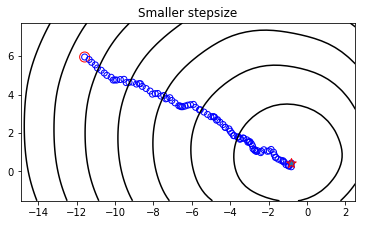

In [70]:
plot_levelset(A, y, mu, b[1].T)
plot_solution(b[0])
plt.title('Smaller stepsize', fontdict=None, loc='center', pad=None)

Text(0.5,1,'Smallest stepsize')

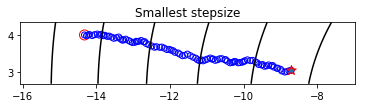

In [71]:
plot_levelset(A, y, mu, c[1].T)
plot_solution(c[0])
plt.title('Smallest stepsize', fontdict=None, loc='center', pad=None)

Text(0.5,1,'Smaller batchsize')

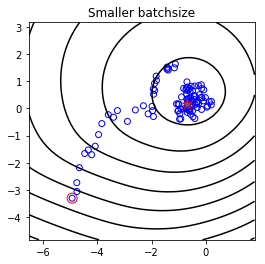

In [72]:
plot_levelset(A, y, mu, d[1].T)
plot_solution(d[0])
plt.title('Smaller batchsize', fontdict=None, loc='center', pad=None)

Text(0.5,1,'Smallest batchsize')

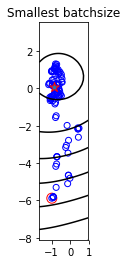

In [73]:
plot_levelset(A, y, mu, e[1].T)
plot_solution(e[0])
plt.title('Smallest batchsize', fontdict=None, loc='center', pad=None)

### We can see that when the batch size is large (first two graphs) then it converges slower than with mini_batches and single element batches (last two graphs) but then it gets more accurate than small batches. The iterations are also less spread out with large batch sizes. We go more or less straight to the solution. On the other hand with mini batches we are all over the place, we converge quickly but then after some time the accuracy does not improve as much as with full_batch and we converge to a small ball around the solution. Also the smaller the step size the less inaccuracy there is width-wise. We go to the solution in a much straighter way even if it takes longer (the errors arent that significant but the progress is also not that significant per iteration).

**5.3)** D'après le cours, on sait qu'après un grand nombre d'itérations, la suite va (en moyenne) être contenue dans une boule centrée en `w_sol` et de rayon `r`, donné par

$$ r = \sqrt{\frac{2\sigma^2\lambda}{\mu}} \quad \text{ où } \sigma^2 = \E_S\left[ \Vert \nabla f_S(w_{sol}) \Vert^2 \right] \text{ et } \lambda \text{ est le pas de l'algorithme}. $$

Par ailleurs, il est possible de montrer que  $\sigma^2 = \frac{m-b}{b(m-1)} \frac{1}{m}\sum\limits_{i=1}^m \Vert \nabla f_i(w_{sol}) \Vert^2$, où ici  $b$ est la taille du batch et $m$ le nombre de données (cf. [Proposition 3.10.iii ici](https://arxiv.org/pdf/1901.09401.pdf)).

Définir une fonction `expected_radius(A, y, mu, w_sol, batch_size, stepsize_factor)` qui renvoie la valeur de ce rayon $r$ en fonction des paramètres du problème et de l'algorithme.

In [74]:
def expected_radius(A, y, mu, w_sol, batch_size, stepsize_factor):
    m = len(A)
    b = batch_size
    sumgrad = 0
    for i in range(1,m):
        sumgrad += grad_logistic(A, y, mu, w_sol, i).T@grad_logistic(A, y, mu, w_sol, i)
    sigmasqrd = (1/m)*sumgrad*(m-b)/(b*(m-1))
    r = math.sqrt(2*sigmasqrd*(stepsize_factor)/((Lipschitz_batch(A, mu, batch_size)*mu)))
    return r
    
    

**5.4)** Reprendre la question **5.1)** en utilisant cette fois-ci `plot_solution(w_sol, rayon)`, en utilisant un rayon que vous calculerez avec la fonction précédente. 

Est-ce que le résultat est fidèle à la théorie? Discuter.

In [75]:
mu=0.2
a = SGD(A,y,mu, 100,15,0.5, 10*randn(2))
w_sol = a[0]

In [76]:
rayon = expected_radius(A, y, mu, w_sol, 15, 0.5)
rayon

0.28407815039169326

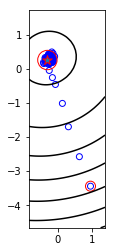

In [77]:
plot_levelset(A, y, mu, a[1].T)
plot_solution(w_sol,rayon)

### By tweaking the parameters we can see that yes this is consistent with theory. For mini batches we converge to a ball around the real value. Also, with larger batches and/or smaller stepsize we can get much closer to the solution and thus the accuracy is larger and the radius is smaller.

**Bonus:** Un widget interactif pour montrer la convergence des itérés

In [78]:
iter_max = 1000
mu = 0.2
starting_point = 3*randn(2)
stepsize_factor_max = 1

[_, X_messy] = SGD(A, y, mu, iter_max*10, 
                            batch_size=1, stepsize_factor=stepsize_factor_max,  starting_point=starting_point)
box = get_box(X_messy, crop=0.2, option="square")
[wsol, X_GD] = SGD(A, y, mu, iter_max, 
                           batch_size=nb_data, stepsize_factor=0.2,  starting_point=starting_point)

In [79]:
def widget_iterates(stepsize_factor, batch_size):
    [w, iterates] = SGD(A, y, mu, iter_max, 
                               batch_size=batch_size, 
                               stepsize_factor=stepsize_factor, 
                               starting_point=starting_point)
    
    comp = int(iter_max*batch_size/nb_data)
    # We plot many things
    _=plt.figure(dpi=100, figsize=(12, 4))
    
    rayon = expected_radius(A, y, mu, wsol, batch_size, stepsize_factor)
    plot_levelset(A, y, mu, iterates, box=box)
    plot_solution(wsol, rayon)
    
    
    """_ = plt.title(r"Trajectoire de SGD, fonction logistique." + 
                  "\n  Pas relatif: " + str(stepsize_factor) + ", batch size: " + str(batch_size) + 
                 "\n Complexité: " + str(iter_max*batch_size))
    """
    #plt.gcf().gca().titleweight="light"
    _ = plt.show()

In [80]:
#plt.rcParams['figure.dpi'] = 120 # To be changed depending on screen resolution
#interactive(widget_iterates, 
  #          stepsize_factor=widgets.FloatSlider(min=0.01, max=stepsize_factor_max, step=0.01, value=0.5), 
      #      batch_size=widgets.IntSlider(min=1, max=nb_data, step=1, value=1))